In [1]:
from motion_detection.dataset import CustomDataset
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
dataset = CustomDataset('../data/train', '../data')

/home/paradise/.venvs/base-3.10/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [3]:
random_indices = np.random.choice(len(dataset), 10)

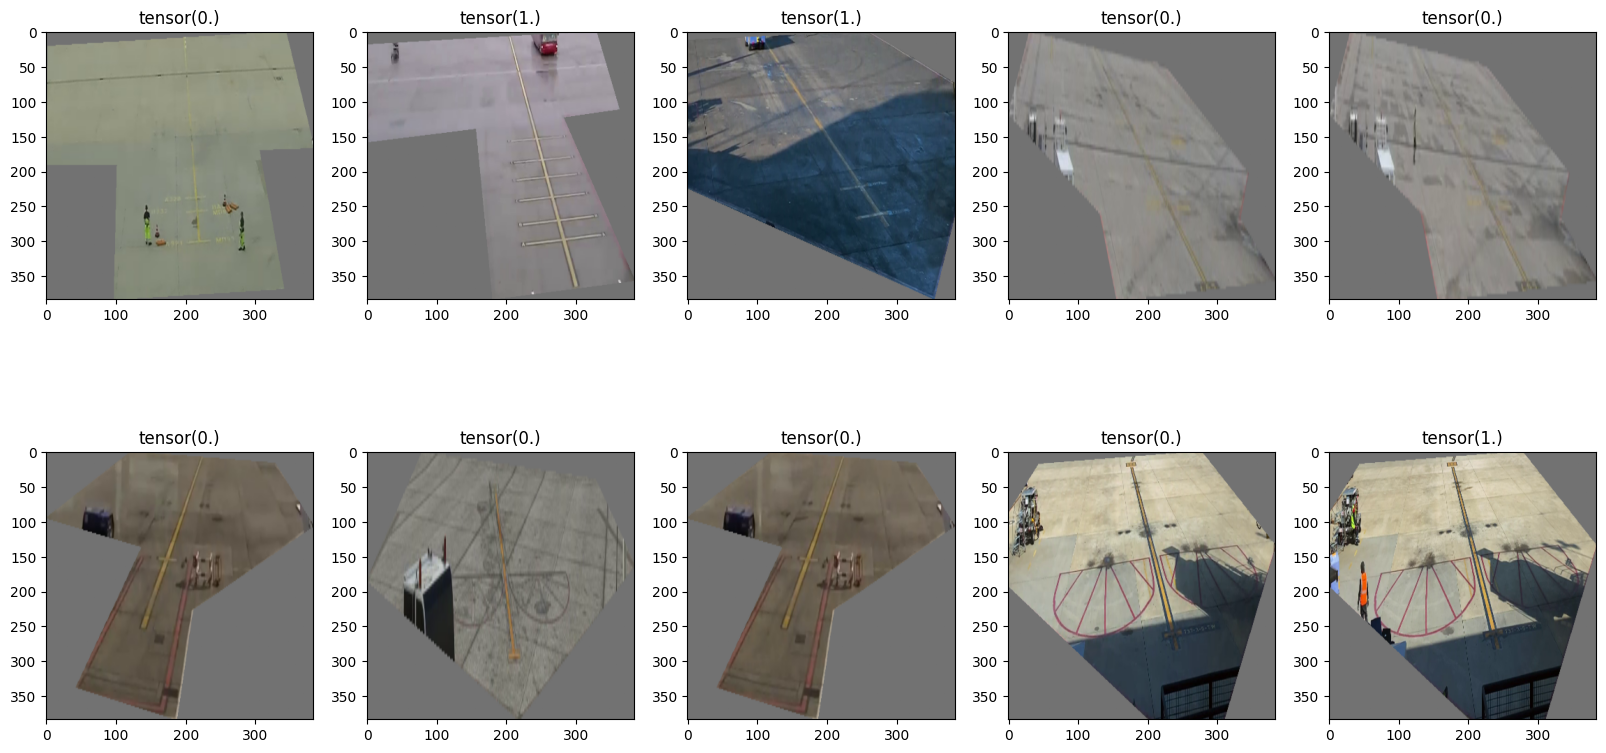

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
images, labels = dataset[random_indices]
for i, (img, label) in enumerate(zip(images, labels)):
    img = img.permute(1, 2, 0).numpy()
    ax[i // 5, i % 5].imshow(img)
    ax[i // 5, i % 5].set_title(label)
    

In [19]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:01<00:00, 3.28MB/s]


In [29]:
video = cv2.VideoCapture('../data/train/video_5.mp4')
frames = []
while True:
    ret, frame = video.read()
    if not ret:
        break
    frames.append(frame)   

In [45]:
def annotate_frame(frame):
    pred = model.predict(frame[:, :, ::-1])
    annotated_frame = pred[0].plot()
    return annotated_frame

interactive(children=(IntSlider(value=72, description='frame_id', max=144), Output()), _dom_classes=('widget-i…

In [32]:
for frame in frames:
    annotate_frame(frame)
    

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.annotate_frame(frame)>